Quick and dirty visualizer based on Lauren's code.

In [45]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

Here is a scheme from [this link](http://sweetme.at/2013/10/21/how-to-detect-python-2-vs-3-in-your-python-script/) that imports `urllib2` properly depending on the Python version.

In [46]:
import sys
if (sys.version_info > (3, 0)):
    import urllib.request as urllib2
else:
    import urllib2

For the given URLs of the calibrator (usually 3C48 or 3C295) and the maser target, the text files from the are stored as local strings.

In [47]:
cal_URL = 'http://www.gb.nrao.edu/20m/peak/3C48-028/Skynet_57670_3C48-028_24454_24482.A.spect.cal.txt';
cal_response = urllib2.urlopen(cal_URL);

target_URL = 'http://www.gb.nrao.edu/20m/peak/W3-028/Skynet_57639_W3-028_23774_23815.A.spect.cal.txt';
target_response = urllib2.urlopen(target_URL);

The web strings are loaded like text files. After skipping the header rows, the remaining columns of numbers are loaded into numpy arrays. The preceding outputs can only be called once lest the buffer read get stuck at the end, it seems. So, below is a single call to make a six-column array which is then sliced into the two IFs. Furthremore, these different arrays could easily be a single array with numerous columns, but are separate here for transparency of processing.

In [48]:
cal = np.loadtxt(cal_response, skiprows = 45, usecols = (0,1,2,3,4,5));
cal_IF1 = cal[:,0:3]; # 'slicing' starts with index 0 and ends with index 3-1 apparently
cal_IF2 = cal[:,3:]; # end limit blank means all the way to the end (not end-1) apparently
target = np.loadtxt(target_response, skiprows = 45, usecols = (0,1,2,3,4,5));
target_IF1 = target[:,0:3];
target_IF2 = target[:,3:];

Plot up a quick look at the different IFs and polarizations.

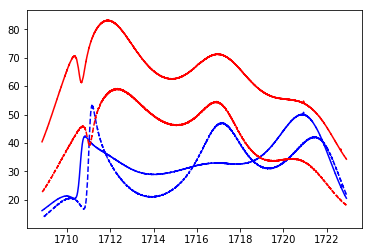

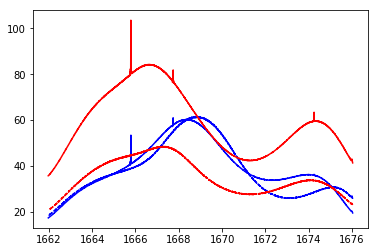

In [49]:
plt.figure(1)
plt.plot(cal_IF1[:,0], cal_IF1[:,1], 'b--')
plt.plot(target_IF1[:,0], target_IF1[:,1], 'b-')
plt.plot(cal_IF1[:,0], cal_IF1[:,2], 'r--')
plt.plot(target_IF1[:,0], target_IF1[:,2], 'r-')
plt.show()
plt.figure(2)
plt.plot(cal_IF2[:,0], cal_IF2[:,1], 'b--')
plt.plot(target_IF2[:,0], target_IF2[:,1], 'b-')
plt.plot(cal_IF2[:,0], cal_IF2[:,2], 'r--')
plt.plot(target_IF2[:,0], target_IF2[:,2], 'r-')
plt.show() 

Without calibrating the bandpass, attempt a polynomial baseline fit in order to flatten the spectrum and retrieve some instructive stats. Arbitrarily choose ninth order polynomial. User inputs the limits of the fit as channel numbers.

In [50]:
# number of channels
len( cal_IF2[:,0] )

7373

In [51]:
chmin = 2000;
chmax = 2200;

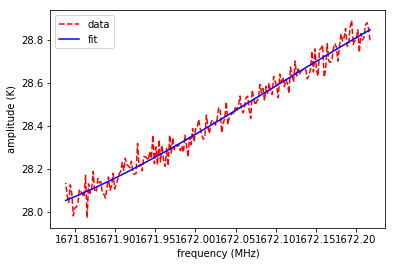

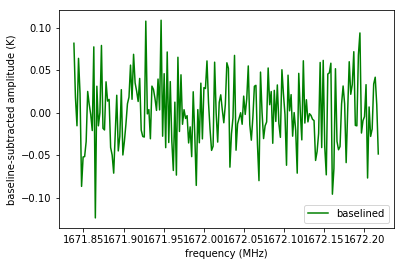

In [52]:
def baseline(x, a9,a8,a7,a6,a5,a4,a3,a2,a1,a0):
    return a9*x*x*x*x*x*x*x*x*x+a8*x*x*x*x*x*x*x*x+a7*x*x*x*x*x*x*x+a6*x*x*x*x*x*x+a5*x*x*x*x*x+a4*x*x*x*x+a3*x*x*x+a2*x*x+a1*x+a0

popt, pcov = curve_fit(baseline, cal_IF2[chmin:chmax,0], cal_IF2[chmin:chmax,2], bounds=([-2,-2,-10,-10,-10,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[2,2,10,10,10,np.inf,np.inf,np.inf,np.inf,np.inf]));

plt.figure();
plt.plot(cal_IF2[:,0], cal_IF2[:,2], 'r--', label='data')
plt.plot(cal_IF2[:,0], baseline(cal_IF2[:,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF2[chmin:chmax,0], cal_IF2[chmin:chmax,2], 'r--', label='data')
plt.plot(cal_IF2[chmin:chmax,0], baseline(cal_IF2[chmin:chmax,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF2[chmin:chmax,0], cal_IF2[chmin:chmax,2]-baseline(cal_IF2[chmin:chmax,0], *popt), 'g-', label='baselined')
plt.xlabel('frequency (MHz)')
plt.ylabel('baseline-subtracted amplitude (K)')
plt.legend()
plt.show()

The root&ndash;mean&ndash;square of the flattened spectrum is given below.

In [53]:
rmsIF2Pol2 = np.sqrt( np.mean( (cal_IF2[chmin:chmax,2]-baseline(cal_IF2[chmin:chmax,0], *popt))*(cal_IF2[chmin:chmax,2]-baseline(cal_IF2[chmin:chmax,0], *popt)) ) );
rmsIF2Pol2

0.041203049931715863

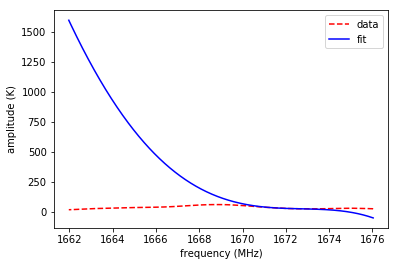

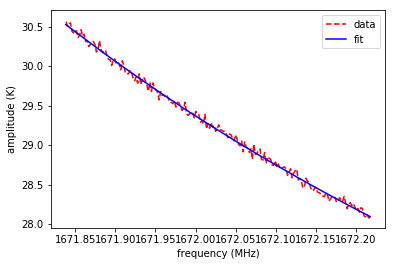

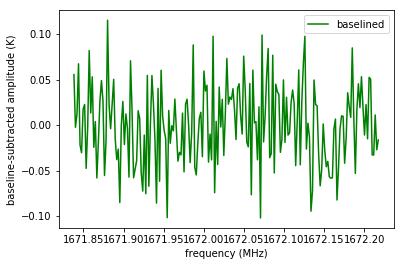

In [54]:
popt, pcov = curve_fit(baseline, cal_IF2[chmin:chmax,0], cal_IF2[chmin:chmax,1], bounds=([-2,-2,-10,-10,-10,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[2,2,10,10,10,np.inf,np.inf,np.inf,np.inf,np.inf]));

plt.figure();
plt.plot(cal_IF2[:,0], cal_IF2[:,1], 'r--', label='data')
plt.plot(cal_IF2[:,0], baseline(cal_IF2[:,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF2[chmin:chmax,0], cal_IF2[chmin:chmax,1], 'r--', label='data')
plt.plot(cal_IF2[chmin:chmax,0], baseline(cal_IF2[chmin:chmax,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF2[chmin:chmax,0], cal_IF2[chmin:chmax,1]-baseline(cal_IF2[chmin:chmax,0], *popt), 'g-', label='baselined')
plt.xlabel('frequency (MHz)')
plt.ylabel('baseline-subtracted amplitude (K)')
plt.legend()
plt.show()

In [55]:
rmsIF2Pol1 = np.sqrt( np.mean( (cal_IF2[chmin:chmax,1]-baseline(cal_IF2[chmin:chmax,0], *popt))*(cal_IF2[chmin:chmax,1]-baseline(cal_IF2[chmin:chmax,0], *popt)) ) );
rmsIF2Pol1

0.043366509527867317

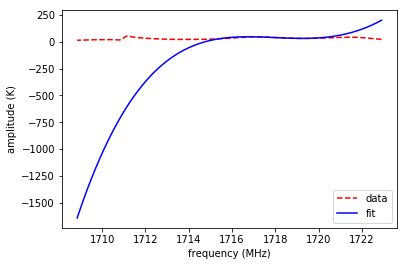

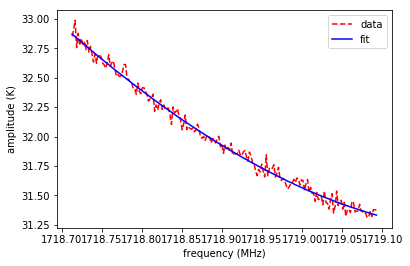

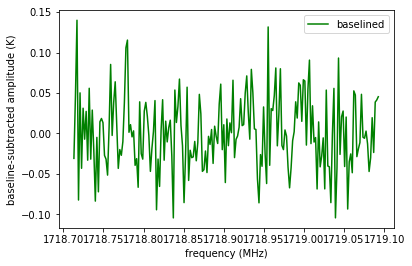

In [56]:
popt, pcov = curve_fit(baseline, cal_IF1[chmin:chmax,0], cal_IF1[chmin:chmax,1], bounds=([-2,-2,-10,-10,-10,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[2,2,10,10,10,np.inf,np.inf,np.inf,np.inf,np.inf]));

plt.figure();
plt.plot(cal_IF1[:,0], cal_IF1[:,1], 'r--', label='data')
plt.plot(cal_IF1[:,0], baseline(cal_IF1[:,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF1[chmin:chmax,0], cal_IF1[chmin:chmax,1], 'r--', label='data')
plt.plot(cal_IF1[chmin:chmax,0], baseline(cal_IF1[chmin:chmax,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF1[chmin:chmax,0], cal_IF1[chmin:chmax,1]-baseline(cal_IF1[chmin:chmax,0], *popt), 'g-', label='baselined')
plt.xlabel('frequency (MHz)')
plt.ylabel('baseline-subtracted amplitude (K)')
plt.legend()
plt.show()

In [57]:
rmsIF1Pol1 = np.sqrt( np.mean( (cal_IF1[chmin:chmax,1]-baseline(cal_IF1[chmin:chmax,0], *popt))*(cal_IF1[chmin:chmax,1]-baseline(cal_IF1[chmin:chmax,0], *popt)) ) );
rmsIF1Pol1

0.044833044796401197

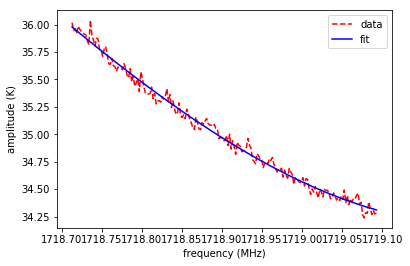

In [58]:
popt, pcov = curve_fit(baseline, cal_IF1[chmin:chmax,0], cal_IF1[chmin:chmax,2], bounds=([-2,-2,-10,-10,-10,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],[2,2,10,10,10,np.inf,np.inf,np.inf,np.inf,np.inf]));

plt.figure();
plt.plot(cal_IF1[:,0], cal_IF1[:,2], 'r--', label='data')
plt.plot(cal_IF1[:,0], baseline(cal_IF1[:,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF1[chmin:chmax,0], cal_IF1[chmin:chmax,2], 'r--', label='data')
plt.plot(cal_IF1[chmin:chmax,0], baseline(cal_IF1[chmin:chmax,0], *popt), 'b-', label='fit')
plt.xlabel('frequency (MHz)')
plt.ylabel('amplitude (K)')
plt.legend()
plt.show()
plt.figure();
plt.plot(cal_IF1[chmin:chmax,0], cal_IF1[chmin:chmax,2]-baseline(cal_IF1[chmin:chmax,0], *popt), 'g-', label='baselined')
plt.xlabel('frequency (MHz)')
plt.ylabel('baseline-subtracted amplitude (K)')
plt.legend()
plt.show()

In [59]:
rmsIF1Pol2 = np.sqrt( np.mean( (cal_IF1[chmin:chmax,2]-baseline(cal_IF1[chmin:chmax,0], *popt))*(cal_IF1[chmin:chmax,2]-baseline(cal_IF1[chmin:chmax,0], *popt)) ) );
rmsIF1Pol2

0.049183174711703977

We may compare our four results with those derived from the file header.

In [60]:
#do the URL read again to get a fresh file object---perhaps there is a rewind or something?
cal_response = urllib2.urlopen(cal_URL);
for line in cal_response:
    if ('TSYS' in line) or ('BW' in line) or ('CHAN' in line):
        print line

#        OBSBW=-15.6250

#        NCHAN=8192

#    STARTCHAN=409

#     STOPCHAN=7782

#         TSYS=XX1:31.30, YY1:42.08

#         TSYS=XX2:37.90, YY2:35.08



Using Equation (3.162) from the [online Virginia textbook](http://www.cv.nrao.edu/~sransom/web/Ch3.html), we find

In [61]:
Deltanu = 15.6250E6/8192;  # in Hz
tau = 260.0; # the on-source duration from the summary page, in seconds
TSYS = np.array([ [31.30, 42.08],[37.90, 35.08] ]);
sigma = 2.0*TSYS/m.sqrt(Deltanu*tau);
sigma

array([[ 0.08889403,  0.11950994],
       [ 0.10763846,  0.09962948]])

And for the data and channel choices on this page we find

In [62]:
rms = np.array([ [rmsIF1Pol1,rmsIF1Pol2],[rmsIF2Pol1,rmsIF2Pol2]]);
rms

array([[ 0.04483304,  0.04918317],
       [ 0.04336651,  0.04120305]])

We expect the actual data to be a little worse than the ideal expectation. In other words, the values of the array below should all be between unity and a few.

In [63]:
ratio = rms/sigma;
ratio

array([[ 0.50434256,  0.41154047],
       [ 0.40289045,  0.41356283]])

Eventually, the reading of the header values will be automated.